In [31]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import zscore, probplot

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [33]:
df = pd.read_csv('retail_store_inventory.csv')
print(df.shape)
df.head()

(73100, 15)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


Basic Info and Summary

In [34]:
# Display basic dataset information
print("Basic Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


Checking and Visualizing the Missing Values

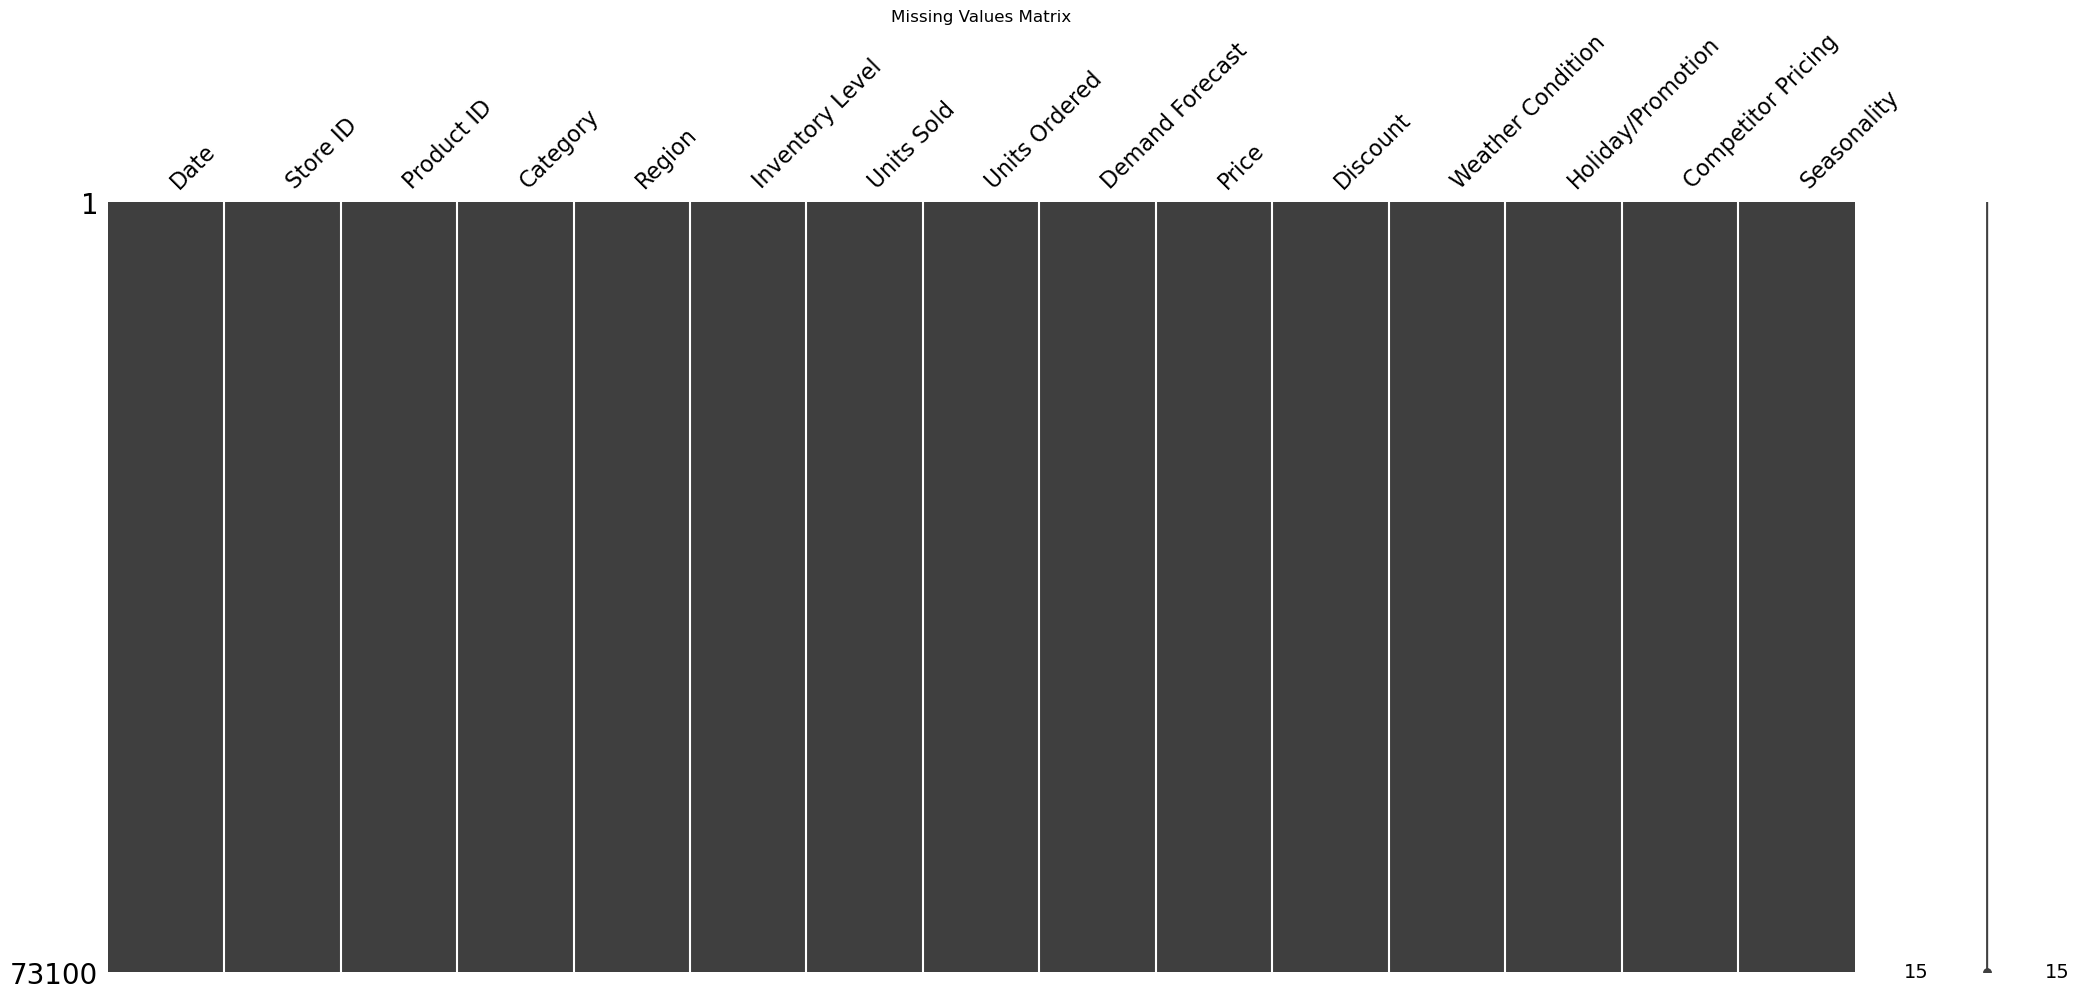


Missing Value Statistics:


,Missing Values,Percentage


In [8]:
# Visualizing missing values using missingno
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# Checking missing value statistics
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})

# Display only columns with missing values
print("\nMissing Value Statistics:")
display(missing_data[missing_data["Missing Values"] > 0])


In [10]:
# Count missing values per column
missing_values = df.isnull().sum()

# Print only columns with missing values
print("Missing Values Count:")
print(missing_values[missing_values > 0])


Missing Values Count:
Series([], dtype: int64)


In [13]:
df.duplicated().sum()

0

In [35]:
import pandas as pd

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by='Date')

# Apply Moving Averages
df['Units_Sold_MA7'] = df['Units Sold'].rolling(window=7).mean()
df['Units_Sold_MA14'] = df['Units Sold'].rolling(window=14).mean()


df['Units_Ordered_MA7'] = df['Units Ordered'].rolling(window=7).mean()
df['Units_Ordered_MA14'] = df['Units Ordered'].rolling(window=14).mean()

df['Demand_Forecast_MA7'] = df['Demand Forecast'].rolling(window=7).mean()
df['Demand_Forecast_MA14'] = df['Demand Forecast'].rolling(window=14).mean()

df['Price_MA7'] = df['Price'].rolling(window=7).mean()
df['Price_MA14'] = df['Price'].rolling(window=14).mean()

df['Competitor_Pricing_MA7'] = df['Competitor Pricing'].rolling(window=7).mean()
df['Competitor_Pricing_MA14'] = df['Competitor Pricing'].rolling(window=14).mean()

# Drop initial NaN values from rolling averages
df.dropna(inplace=True)

# Check updated dataset
print(df.head())


         Date Store ID Product ID     Category Region  Inventory Level  \
60 2022-01-01     S004      P0001         Toys  South              477   
59 2022-01-01     S003      P0020  Electronics  North              431   
58 2022-01-01     S003      P0019     Clothing   East              330   
57 2022-01-01     S003      P0018         Toys   West              204   
56 2022-01-01     S003      P0017     Clothing   East              429   

    Units Sold  Units Ordered  Demand Forecast  Price  ...  Units_Sold_MA7  \
60         271             66           286.65  15.62  ...      223.857143   
59         370             99           387.57  95.85  ...      249.571429   
58         249             37           268.25  26.71  ...      230.571429   
57          70            170            83.01  97.08  ...      212.000000   
56         150            168           157.82  27.10  ...      233.428571   

   Units_Sold_MA14  Units_Ordered_MA7  Units_Ordered_MA14 Demand_Forecast_MA7  \
60   

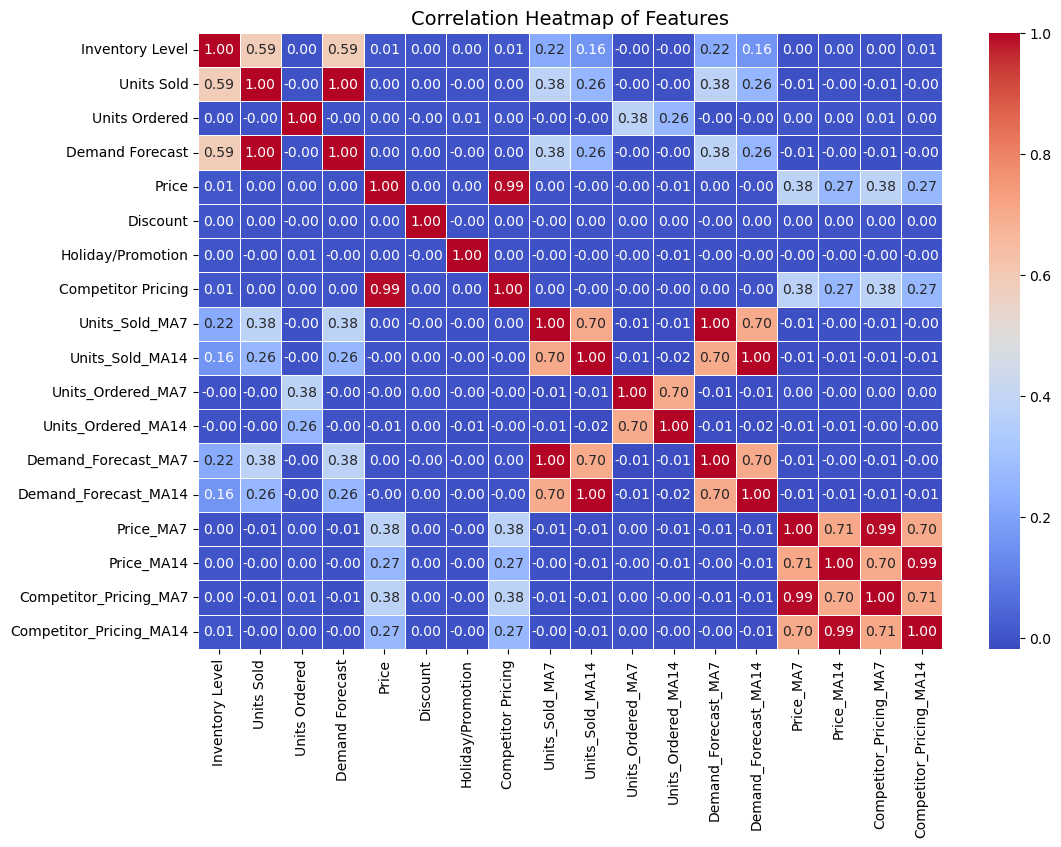

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap of Features", fontsize=14)

# Show plot
plt.show()


# Checking whether outliers are present or not 

In [14]:
from scipy.stats import zscore

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute absolute Z-scores
z_scores = np.abs(zscore(df[numeric_cols]))

# Identify outliers (Z-score > 3)
outliers = df[(z_scores > 3).any(axis=1)]

print(f"Number of Outliers Detected: {len(outliers)}")


Number of Outliers Detected: 284


IQR Method

In [15]:
# Calculate Q1, Q3, and IQR for all numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside 1.5*IQR range)
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Count the number of outliers per column
print(outliers.sum())


Inventory Level         0
Units Sold            715
Units Ordered           0
Demand Forecast       732
Price                   0
Discount                0
Holiday/Promotion       0
Competitor Pricing      0
dtype: int64


Box Plot

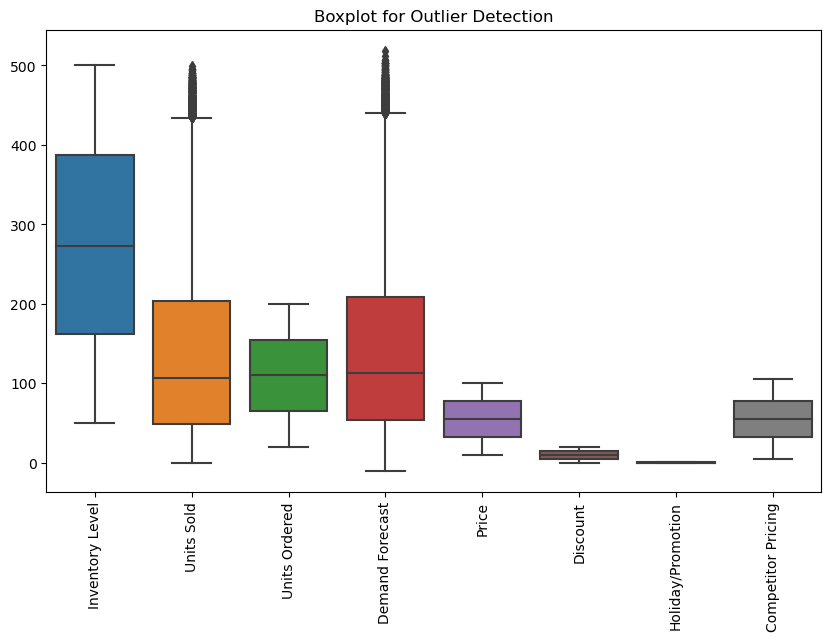

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for all numeric features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title("Boxplot for Outlier Detection")
plt.show()


Histogram Plot

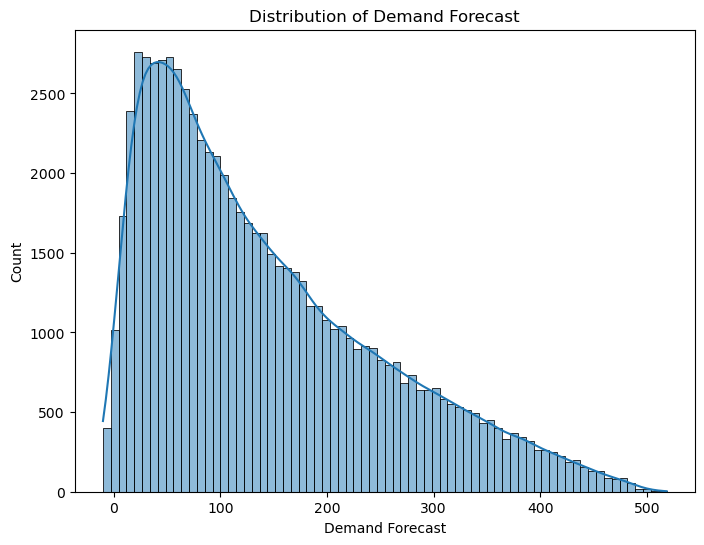

In [17]:
# Histogram for 'Demand Forecast'
plt.figure(figsize=(8, 6))
sns.histplot(df['Demand Forecast'], kde=True)
plt.title("Distribution of Demand Forecast")
plt.show()


In [18]:
print(df['Demand Forecast'].max())

518.55


In [19]:
print(df['Demand Forecast'].min())

-9.99


In [20]:
print(df.shape)
df = df[df['Demand Forecast'] >= 0]  # Remove negative values
print(df.shape)


(73100, 15)
(72427, 15)


In [22]:
print(df.shape)
df = df[df['Units Sold'] <= df['Inventory Level']]  # Remove impossible sales cases
print(df.shape)

(72427, 15)
(72427, 15)


In [23]:
from scipy.stats.mstats import winsorize

# Apply winsorization to Demand Forecast
df['Demand Forecast'] = winsorize(df['Demand Forecast'], limits=[0.05, 0.05])  # Capping bottom and top 5%

# Optional: Apply to other variables like 'Units Sold' if needed
df['Units Sold'] = winsorize(df['Units Sold'], limits=[0.05, 0.05])
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,15.80,73.64,0,Sunny,0,68.95,Summer


In [25]:
print(df.shape)

(72427, 15)


In [26]:
print(df['Demand Forecast'].max())

362.29


In [27]:
print(df['Demand Forecast'].min())

15.8


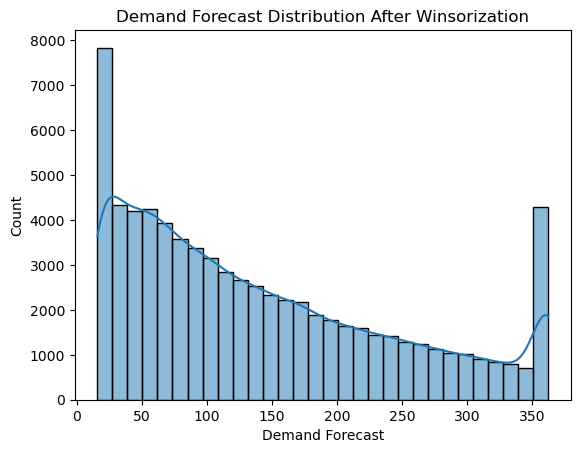

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Demand Forecast'], bins=30, kde=True)
plt.title("Demand Forecast Distribution After Winsorization")
plt.show()


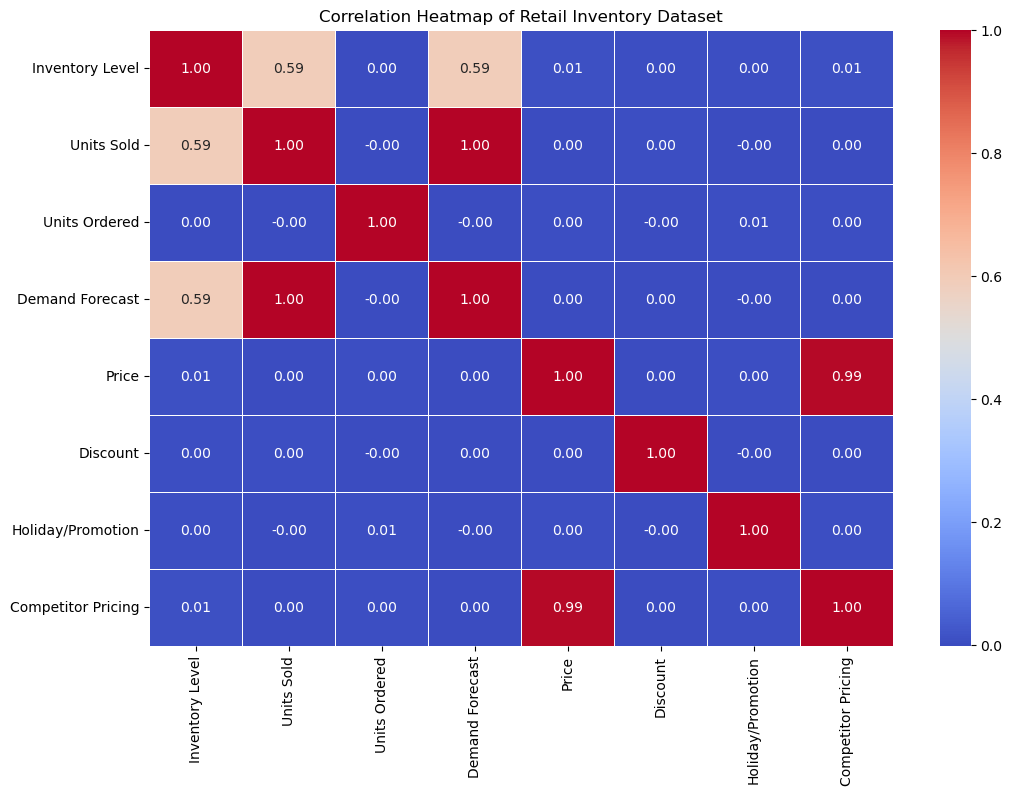

In [30]:
# Selecting only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Retail Inventory Dataset")
plt.show()
